The dataset is initiated as below:

In [ ]:
import numpy as np
import math
x = np.arange(-10, 10, 0.2)
y = (2 * np.cos(x)/(- np.pi)) + (2 * np.sin(2 * x)/(2 * np.pi)) + (2 * np.cos(3 * x)/(-3 * np.pi))
y_v = np.reshape(y,(len(y),1))

I add Gaussian and Poisson noise to the data using **NumPy**:

In [4]:
mean = 0
var = 1 
gaussian_noise = np.random.normal(mean, var, size = len(y))
gaussian = y + 0.12 * gaussian_noise
poisson_noise = np.random.poisson(2, len(y))
poisson = y + 0.12 * poisson_noise

I define a function to calculate the estimated Gaussian and Poisson distributions by computing matrix A (with different exponents of x) and computing B according to the corresponding mathimatical expressions.

In [5]:
def estimations (x,y,n):
    A = np.ones((len(x),2))
    x_v = np.reshape(x,(len(x),1))
    for i in range(1,n+1):
        A_new = np.power(x_v,i)
        A = np.hstack((A,A_new))
    A = np.delete(A,0,1)
    B1 = np.dot(np.matrix.transpose(A),A)
    B2 = np.linalg.inv(B1)
    B3 = A.transpose()
    gaussian_reshape = np.reshape(gaussian,(len(gaussian),1))
    poisson_reshape = np.reshape(poisson,(len(poisson),1))
    B4 = np.dot(B2,B3)
    B_gaussian = np.dot(B4,gaussian_reshape)
    B_poisson = np.dot(B4,poisson_reshape)
    fx_gaussian = np.dot(A,B_gaussian)
    fx_poisson = np.dot(A,B_poisson)
    return fx_gaussian, fx_poisson

I find **minimum** and **maximum** errors of all the 15 different estimations.


As follows, it can be seen that the best degree of the estimator is 15 and the worst is 1:

In [6]:
error_gaussian_n = []
error_poisson_n = []
for i in range(1,16):
    fx_gaussian, fx_poisson = estimations (x,y,i)
    error_gaussian_n.append(1/len(x)*(np.linalg.norm(fx_gaussian - y_v))**2)
    error_poisson_n.append(1/len(x)*(np.linalg.norm(fx_poisson - y_v))**2)

min_gaussian = min(error_gaussian_n)
min_gaussian_index = error_gaussian_n.index(min_gaussian)+1
print("min gaussian index = ", min_gaussian_index)
max_gaussian = max(error_gaussian_n)
max_gaussian_index = error_gaussian_n.index(max_gaussian)+1
print("max gaussian index = ", max_gaussian_index)
min_poisson = min(error_poisson_n)
min_poisson_index = error_poisson_n.index(min_poisson)+1
print("min poisson index = ", min_poisson_index)
max_poisson = max(error_poisson_n)
max_poisson_index = error_poisson_n.index(max_poisson)+1
print("max poisson index = ", max_poisson_index)



min gaussian index =  15
max gaussian index =  1
min poisson index =  15
max poisson index =  1


Plotting the calculated estimations, and finding **MSE error** for each of them as follows:

MSE error gaussian model n=1 0.28776835909197235
MSE error gaussian model n=4 0.22964726615829797
MSE error gaussian model n=7 0.20982053507166448
MSE error gaussian model n=15 0.0508144148443766
MSE error poisson model n=1 0.28776835909197235
MSE error poisson model n=4 0.22964726615829797
MSE error poisson model n=7 0.20982053507166448
MSE error poisson model n=15 0.0508144148443766


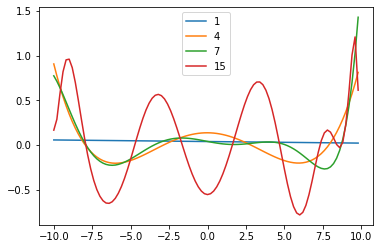

In [7]:
import matplotlib.pyplot as plt
y1_gaussian, y1_poisson = estimations (x,y,1)
y4_gaussian, y4_poisson = estimations (x,y,4)
y7_gaussian, y7_poisson = estimations (x,y,7)
y15_gaussian, y15_poisson = estimations (x,y,15)
plt.plot(x,y1_gaussian,label='n=1')
plt.plot(x,y4_gaussian,label='n=4')
plt.plot(x,y7_gaussian,label='n=7')
plt.plot(x,y15_gaussian,label='n=15')
plt.legend(['1','4','7','15'])
print("MSE error gaussian model n=1",error_gaussian_n[0])
print("MSE error gaussian model n=4",error_gaussian_n[3])
print("MSE error gaussian model n=7",error_gaussian_n[6])
print("MSE error gaussian model n=15",error_gaussian_n[14])
print("MSE error poisson model n=1",error_gaussian_n[0])
print("MSE error poisson model n=4",error_gaussian_n[3])
print("MSE error poisson model n=7",error_gaussian_n[6])
print("MSE error poisson model n=15",error_gaussian_n[14])




By using the mathematical expressions we have for **bias** and **variance**, I define the two functions below to calculate these values.

In [18]:
import math

def var_calc(f):
    E = sum(f) / len(f)
    new_f = np.empty((1, len(f)))
    new_f = ((f - E) ** 2)
    variance = sum(new_f) / len(new_f)
    return variance

def bias_calc (f,f_star,variance):
    new_f = (f - f_star) ** 2
    E = sum(new_f) / len(new_f)
    bias = math.sqrt(E - variance)
    return bias

calculating bias and variance for each of the cases as follows:

In [24]:
var_1_gaussian = var_calc(y1_gaussian)
var_1_poisson = var_calc(y1_poisson)
bias_1_gaussian = bias_calc(y1_gaussian,y15_gaussian,var_1_gaussian)
bias_1_poisson = bias_calc(y1_poisson,y15_poisson,var_1_poisson)
print("variance for n=1 gaussian = ",var_1_gaussian)
print("variance for n=1 poisson = ",var_1_poisson)
print("bias for n=1 gaussian = ",bias_1_gaussian)
print("bias for n=1 poisson = ", bias_1_poisson)

variance for n=1 gaussian =  [0.00010497]
variance for n=1 poisson =  [0.00051191]
bias for n=1 gaussian =  0.48857515069655155
bias for n=1 poisson =  0.49278958808790874


In [25]:
var_4_gaussian = var_calc(y4_gaussian)
var_4_poisson = var_calc(y4_poisson)
bias_4_gaussian = bias_calc(y4_gaussian,y15_gaussian,var_4_gaussian)
bias_4_poisson = bias_calc(y4_poisson,y15_poisson,var_4_poisson)
print("variance for n=4 gaussian = ",var_4_gaussian)
print("variance for n=4 poisson = ",var_4_poisson)
print("bias for n=4 gaussian = ",bias_4_gaussian)
print("bias for n=4 poisson = ", bias_4_poisson)

variance for n=4 gaussian =  [0.05712822]
variance for n=4 poisson =  [0.05007849]
bias for n=4 gaussian =  0.3530710597522217
bias for n=4 poisson =  0.37908895177787416


In [26]:
var_7_gaussian = var_calc(y7_gaussian)
var_7_poisson = var_calc(y7_poisson)
bias_7_gaussian = bias_calc(y7_gaussian,y15_gaussian,var_7_gaussian)
bias_7_poisson = bias_calc(y7_poisson,y15_poisson,var_7_poisson)
print("variance for n=7 gaussian = ",var_7_gaussian)
print("variance for n=7 poisson = ",var_7_poisson)
print("bias for n=7 gaussian = ",bias_7_gaussian)
print("bias for n=7 poisson = ", bias_7_poisson)

variance for n=1 gaussian =  [0.0727685]
variance for n=1 poisson =  [0.07730579]
bias for n=7 gaussian =  0.3055791256898673
bias for n=7 poisson =  0.29875378998089364


In [28]:
var_15_gaussian = var_calc(y15_gaussian)
var_15_poisson = var_calc(y15_poisson)
print("variance for n=15 gaussian = ",var_15_gaussian)
print("variance for n=15 poisson = ",var_15_poisson)


variance for n=15 gaussian =  [0.23891561]
variance for n=15 poisson =  [0.24386541]
